# Assessing the Impact of Daylight Savings Time on Driving Fatalities

- Anastasiades, Andrew
- Drozdzewicz, Peter
- Garcia, Viera
- Sperry, Taylor
- Surapanemi, Sindhura

### DEPENDENCIES

In [1]:
import pandas as pd #data manipulation
import os #Interoperability
import matplotlib.pyplot as plt

### FILE PATHS

In [2]:
accident_csv = os.path.join("Resources", "accident.csv")

### LOAD DATAFRAME

In [3]:
raw_df = pd.read_csv(accident_csv)
raw_df.columns

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (40,42,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [4]:
columns_to_keep = ['STATENAME', 'DAY', 'MONTH','YEAR','HOUR','DAY_WEEK','DAY_WEEKNAME', 'LGT_CONDNAME',
                   'DRUNK_DR', 'WEATHERNAME', 'RUR_URBNAME', 'FATALS',]
df = pd.read_csv(accident_csv, usecols=columns_to_keep)

### CLEAN DATAFRAME

In [5]:
# EXCLUDE DRUNK DRIVERS
df = df[df["DRUNK_DR"]==0] 
df.drop(axis=1, labels=["DRUNK_DR"], inplace=True)

In [6]:
# ADD DATE AND WEEKNUM
df["DATE"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])
df["WEEK_NUM"] = df["DATE"].dt.week

In [7]:
# SPLIT SAMPLE AND CONTROL
control_states = ["Arizona", "Hawaii"] #These states do not observe DLS
control_df = df[df.loc[:,'STATENAME'].isin(control_states)] #NO DLS
sample_df = df[~df.loc[:,'STATENAME'].isin(control_states)] #

In [8]:
sample_df

,STATENAME,DAY,MONTH,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,RUR_URBNAME,LGT_CONDNAME,WEATHERNAME,FATALS,DATE,WEEK_NUM
1,Alabama,23,1,2019,4,Wednesday,18,Urban,Dark - Not Lighted,Rain,1,2019-01-23,4
2,Alabama,22,1,2019,3,Tuesday,19,Rural,Dark - Not Lighted,Cloudy,1,2019-01-22,4
3,Alabama,22,1,2019,3,Tuesday,3,Rural,Dark - Not Lighted,Clear,1,2019-01-22,4
5,Alabama,7,1,2019,2,Monday,12,Rural,Daylight,Clear,1,2019-01-07,2
6,Alabama,2,1,2019,4,Wednesday,9,Rural,Daylight,Cloudy,1,2019-01-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33236,Wyoming,4,10,2019,6,Friday,15,Rural,Daylight,Clear,1,2019-10-04,40
33237,Wyoming,3,10,2019,5,Thursday,14,Rural,Daylight,Clear,1,2019-10-03,40
33238,Wyoming,27,10,2019,1,Sunday,3,Rural,Dark - Not Lighted,Snow,1,2019-10-27,43
33239,Wyoming,28,9,2019,7,Saturday,18,Rural,Dusk,Severe Crosswinds,1,2019-09-28,39


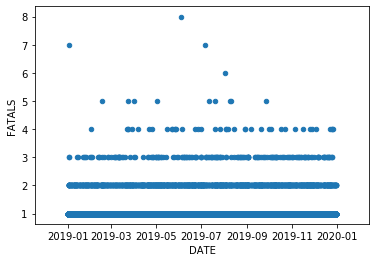

In [9]:
sample_df.plot(x="DATE", y="FATALS", kind="scatter")

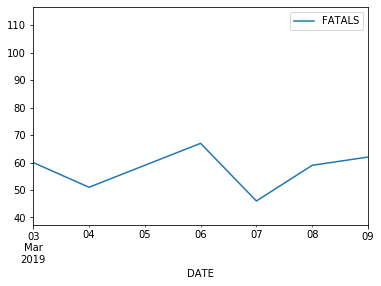

In [10]:
start_date = '2019-03-03'
end_date = '2019-03-09'

sample_gb = sample_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

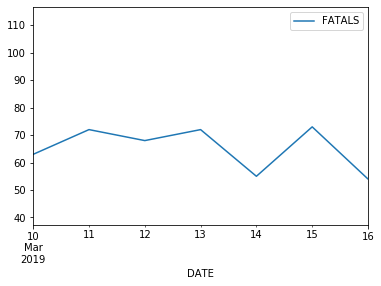

In [11]:
start_date = '2019-03-10'
end_date = '2019-03-16'
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

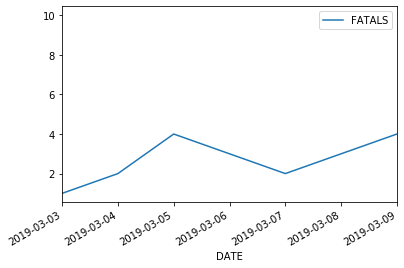

In [12]:
start_date = '2019-03-03'
end_date = '2019-03-09'

sample_gb = control_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

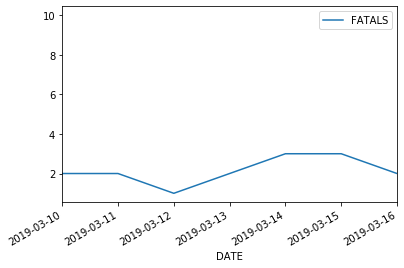

In [35]:
start_date = pd.to_datetime('2019-03-10')
end_date = pd.to_datetime('2019-03-16')

sample_gb = control_df.groupby("DATE")
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
summary.plot(x="DATE", y="FATALS", kind="line")
plt.xlim(start_date, end_date)
plt.show()

### 

(array([0.59890432, 1.19780864, 2.39561728, 3.59342592, 7.18685184,
        6.58794752, 2.9945216 , 3.59342592, 0.59890432, 2.39561728]),
 array([-0.16996047, -0.13785056, -0.10574064, -0.07363072, -0.0415208 ,
        -0.00941088,  0.02269904,  0.05480896,  0.08691888,  0.1190288 ,
         0.15113872]),
 <a list of 10 Patch objects>)

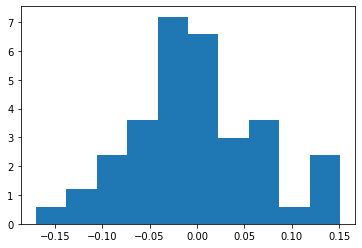

In [50]:
week_gb = sample_df.groupby(by=["WEEK_NUM"])
week_summary = pd.DataFrame(week_gb["FATALS"].sum())
#week_summary["WEEKLY_CHANGE"]
weekly_change = []
for index, row in week_summary.iterrows(): # WE WANT DELTA! FOR EACH WEEK
    if index==1:
        weekly_change.append(0)
    else:
        this_num = week_summary.loc[index, "FATALS"] # FATALITIES FROM THIS WEEK
        last_num = week_summary.loc[index-1, "FATALS"] # FATALITIES FROM LAST WEEK
        delta = (this_num / last_num) - 1
        weekly_change.append(delta)
week_summary["WEEKLY_CHANGE"] = weekly_change
plt.hist(week_summary["WEEKLY_CHANGE"], density=True)

(array([ 1.,  2.,  4.,  6., 12., 11.,  5.,  6.,  1.,  4.]),
 array([-0.16996047, -0.13785056, -0.10574064, -0.07363072, -0.0415208 ,
        -0.00941088,  0.02269904,  0.05480896,  0.08691888,  0.1190288 ,
         0.15113872]),
 <a list of 10 Patch objects>)

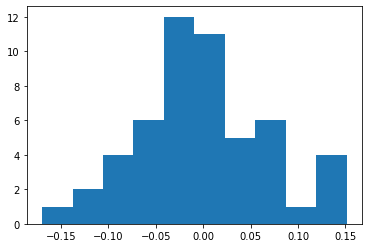

In [37]:
start_date.week

10